# Analisis Exploratorio de Datos

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv('train.csv')

In [10]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
df_train.iloc[0, :20]

Id                    1
MSSubClass           60
MSZoning             RL
LotFrontage        65.0
LotArea            8450
Street             Pave
Alley               NaN
LotShape            Reg
LandContour         Lvl
Utilities        AllPub
LotConfig        Inside
LandSlope           Gtl
Neighborhood    CollgCr
Condition1         Norm
Condition2         Norm
BldgType           1Fam
HouseStyle       2Story
OverallQual           7
OverallCond           5
YearBuilt          2003
Name: 0, dtype: object

In [6]:
df_train.shape

(1460, 81)

In [7]:
df_train['Id']

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [12]:
df_train['Neighborhood'] 

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [7]:
unique_streets = df_train['Street'].unique()
print(unique_streets)

['Pave' 'Grvl']


In [8]:
from scipy.stats import f_oneway

In [13]:
result_anova = f_oneway(df_train['SalePrice'][df_train['PoolArea'] > 0], df_train['SalePrice'][df_train['PoolArea'] == 0])

print("Resultado de ANOVA:")
print("Estadística F:", result_anova.statistic)
print("Valor p:", result_anova.pvalue)

if result_anova.pvalue < 0.05:
    print("Hay diferencias significativas en los precios de venta entre propiedades con y sin área de piscina.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. Los precios de venta no son significativamente diferentes entre propiedades con y sin área de piscina.")


Resultado de ANOVA:
Estadística F: 12.916430057647602
Valor p: 0.00033655238143023933
Hay diferencias significativas en los precios de venta entre propiedades con y sin área de piscina.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

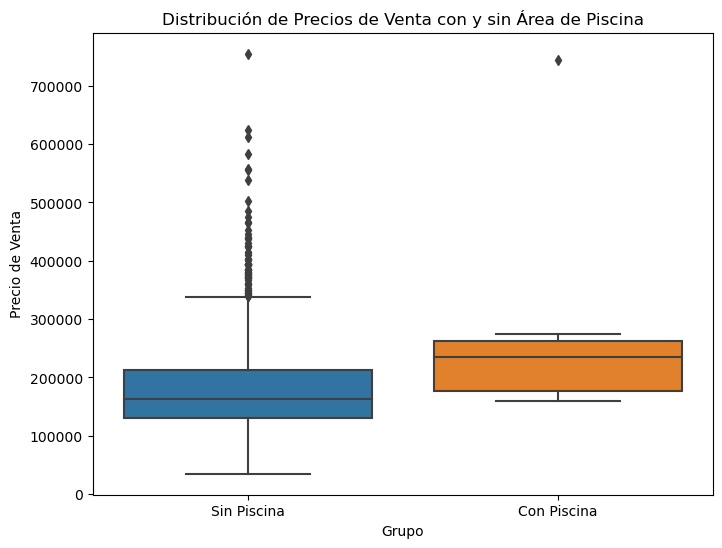

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['PoolArea'].apply(lambda x: 'Con Piscina' if x > 0 else 'Sin Piscina'), y=df_train['SalePrice'])
plt.title('Distribución de Precios de Venta con y sin Área de Piscina')
plt.xlabel('Grupo')
plt.ylabel('Precio de Venta')
plt.show()

In [9]:
df_train[['Id', 'SalePrice']]

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [10]:
df_train['SalePrice'].mean()

180921.19589041095

In [11]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

%matplotlib inline

## 3.- Analisis de Precio de Ventas

In [14]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\diego\AppData\Local\Temp\ipykernel_12244\886804650.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

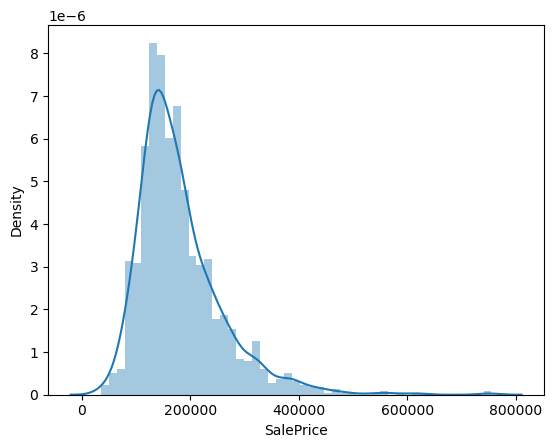

In [15]:
sns.distplot(df_train['SalePrice'])

Podemos conocer el skewness y la kurtosis de la gráfica usando los métodos **skew** y **kurt**

In [16]:
df_train['SalePrice'].skew()

1.8828757597682129

In [17]:
df_train['SalePrice'].kurt()

6.536281860064529

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

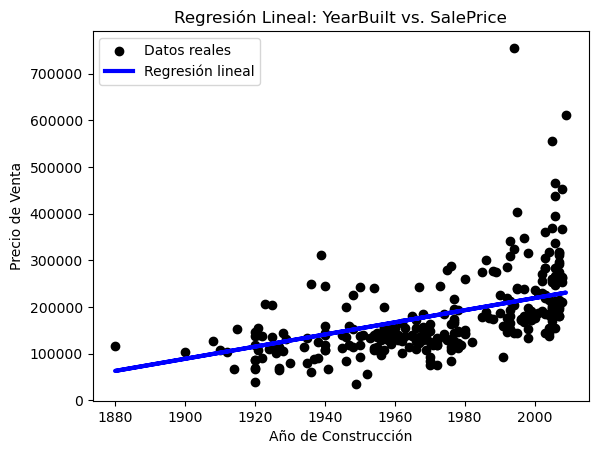

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print(df_train.head())

X = df_train[['YearBuilt']]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regresión lineal')
plt.title('Regresión Lineal: YearBuilt vs. SalePrice')
plt.xlabel('Año de Construcción')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()


In [23]:
from wordcloud import WordCloud

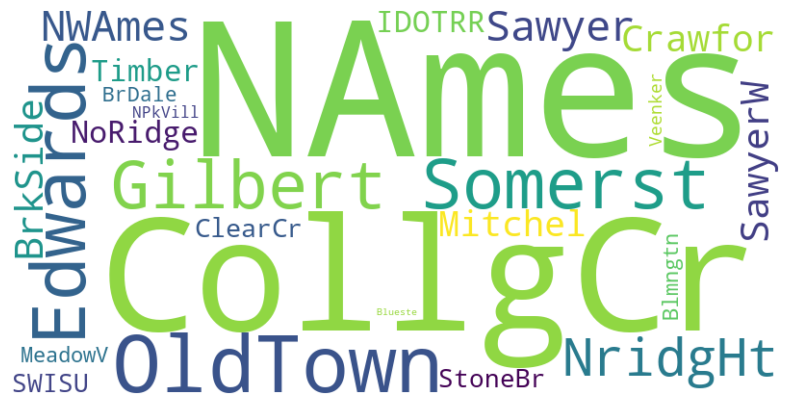

In [25]:
all_neighborhoods = ' '.join(df_train['Neighborhood'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_neighborhoods)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
from sklearn.cluster import KMeans

C:\Users\diego\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\diego\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


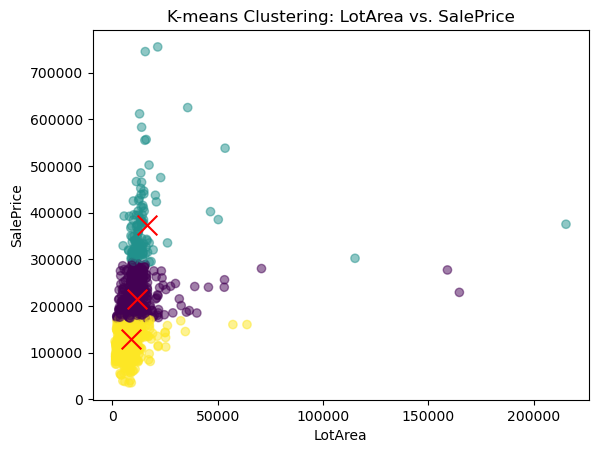

In [30]:
data = df_train[['LotArea', 'SalePrice']]

kmeans = KMeans(n_clusters=3, random_state=42)
df_train['cluster'] = kmeans.fit_predict(data)

plt.scatter(df_train['LotArea'], df_train['SalePrice'], c=df_train['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.title('K-means Clustering: LotArea vs. SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()


#### Relaciones categóricas

Vamos ahor a armar una gráfica de boxplot para verificar el efecto de la Calidad sobre el precio de ventas. 

Comenzamos igual, declara una variable var = "CalidadTotal"

Y una data donde concatenes el precio de ventas con var

Matriz de Correlación

Matriz de Correlación con Números

Podemos ver que:
- Calidad, AreaVivienda y area Sotano estan muy fuertemente correlacionadas con PrecioVenta
- Las variables de garage están super correlacionadas
- Sotano y 1er piso son basicamente hermanos gemelos
- Y AñoConstruccion esta ligeramente correlacionada con PrecioVenta, parece que en un futuro habra que hacer un analisis de serie de tiempo más serio.

Scatter Plots entre Sale Price y variables Correlacionados